In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('TrozoG.txt', delimiter='\t', header=None, skiprows = range(3), decimal = ",", index_col = False)

In [17]:
print(len(data))
data.drop(columns=[3], inplace=True)
data.columns = ['LP','VD','TiempoGABA']
data = data.apply(pd.to_numeric)
# data['Time'] = data.index*0.1
data['Time'] = data.index

print(data.head())

# Sample interval = 0,100000
# Number of channels = 3
# Number of samples per channel = 16384000

16384000
         LP        VD  TiempoGABA  Time
0 -0.006104  0.064697    0.120239     0
1 -0.004272  0.075989    0.126343     1
2 -0.003357  0.087280    0.125427     2
3 -0.005188  0.092468    0.123596     3
4 -0.007324  0.093384    0.118713     4


In [18]:
break_size = 15
breaks = np.arange(0,len(data),break_size)
data['breaks'] = np.repeat(breaks,break_size)[0:len(data)]
data.head(20)

,LP,VD,TiempoGABA,Time,breaks
0,-0.006104,0.064697,0.120239,0,0
1,-0.004272,0.075989,0.126343,1,0
2,-0.003357,0.087280,0.125427,2,0
3,-0.005188,0.092468,0.123596,3,0
4,-0.007324,0.093384,0.118713,4,0
5,-0.010681,0.089722,0.105896,5,0
6,-0.004883,0.086975,0.127258,6,0
7,0.004272,0.092468,0.111084,7,0
8,0.002441,0.087585,0.114136,8,0
9,0.003357,0.080872,0.110779,9,0


In [19]:
data.dropna(axis=0, how='any',inplace=True)
data.isnull().sum()

LP            0
VD            0
TiempoGABA    0
Time          0
breaks        0
dtype: int64

In [20]:
data.describe()

,LP,VD,TiempoGABA,Time,breaks
count,1.638400e+07,1.638400e+07,1.638400e+07,1.638400e+07,1.638400e+07
mean,1.782227e-11,4.330900e-02,1.361662e-01,8.192000e+06,8.191993e+06
std,8.109792e-02,3.337760e-02,2.849763e-01,4.729654e+06,4.729654e+06
min,-6.420900e-01,-3.088380e-01,-5.462600e-02,0.000000e+00,0.000000e+00
25%,-2.624500e-02,3.326400e-02,1.141360e-01,4.096000e+06,4.095990e+06
50%,0.000000e+00,4.303000e-02,1.199340e-01,8.192000e+06,8.191995e+06
75%,2.441400e-02,5.310100e-02,1.260380e-01,1.228800e+07,1.228799e+07
max,9.265140e-01,5.520630e-01,5.220642e+00,1.638400e+07,1.638399e+07


In [21]:
percentil90_c1 =    np.quantile(data.LP,0.993)
percentil90_c2 =    np.quantile(data.VD,0.95)
percentil90_c3 =    np.quantile(data.TiempoGABA,0.95)

print('Percentil90 LP: %f\nPercentil90: %f\nPercentil90: %f' % (percentil90_c1, percentil90_c2, percentil90_c3))


Percentil90 LP: 0.364075
Percentil90: 0.069580
Percentil90: 0.135803


In [22]:
spikesLP_idx = data.groupby('breaks')['LP'].transform(max) == data['LP']
spikesLP = data[spikesLP_idx]
spikesLP['spike'] = spikesLP['LP'] >= percentil90_c1
spikesLP.head()


C:\Users\marlo\AppData\Local\Temp\ipykernel_5632\373092468.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  spikesLP_idx = data.groupby('breaks')['LP'].transform(max) == data['LP']
C:\Users\marlo\AppData\Local\Temp\ipykernel_5632\373092468.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spikesLP['spike'] = spikesLP['LP'] >= percentil90_c1


,LP,VD,TiempoGABA,Time,breaks,spike
14,0.010071,0.032654,0.122986,14,0,False
15,0.016479,0.024109,0.123901,15,15,False
37,0.008545,0.050964,0.112610,37,30,False
53,0.011902,0.039673,0.106506,53,45,False
54,0.011902,0.037842,0.120239,54,45,False


Text(0.5, 1.0, 'LP')

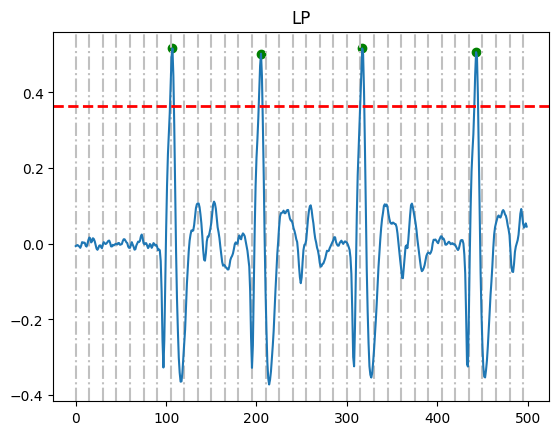

In [23]:
data_init = 0
data_end = 500

df_red = data.iloc[data_init:data_end,:]
sp_red = spikesLP[spikesLP.Time <= data_end]

for i in breaks[breaks<=data_end]:
    plt.axvline(x=i, color = 'silver', linestyle = '-.')

plt.plot(df_red.Time, df_red.LP)
plt.scatter(sp_red.Time[sp_red.spike], sp_red.LP[sp_red.spike], color = 'green')
plt.axhline(y = percentil90_c1, color='r', linestyle='--', linewidth=2)
plt.title('LP')

